In [1]:
import pandas as pd

In [3]:
results = pd.read_json("data/ergast-results.json")

In [32]:
titles = pd.read_csv("archive/dataHandCollected/titles.csv")

In [34]:
titles['year'] = titles['date'].apply(lambda x: x[0:4])
titles = titles.groupby('champion')['year'].min()
titles = pd.DataFrame(titles).reset_index()

In [36]:
titles

,champion,year
0,Alain Prost,1985
1,Alan Jones,1980
2,Alberto Ascari,1952
3,Ayrton Senna,1988
4,Damon Hill,1996
5,Denny Hulme,1967
6,Emerson Fittipaldi,1972
7,Fernando Alonso,2005
8,Graham Hill,1962
9,Jack Brabham,1959


In [38]:
first_season = results.groupby("name")['year'].min()
first_season = pd.DataFrame(first_season).reset_index().rename(columns={'name':'champion','year':'debut'})
first_season

,champion,debut
0,Adolf Brudes,1952.0
1,Adolfo Cruz,1953.0
2,Adrian Sutil,2007.0
3,Adrián Campos,1987.0
4,Aguri Suzuki,1988.0
...,...,...
856,Zsolt Baumgartner,2003.0
857,Élie Bayol,1952.0
858,Éric Bernard,1989.0
859,Érik Comas,1991.0


In [40]:
df = titles.merge(first_season, on='champion', how='left')

In [42]:
df

,champion,year,debut
0,Alain Prost,1985,1980.0
1,Alan Jones,1980,1975.0
2,Alberto Ascari,1952,1950.0
3,Ayrton Senna,1988,1984.0
4,Damon Hill,1996,1992.0
5,Denny Hulme,1967,1965.0
6,Emerson Fittipaldi,1972,1970.0
7,Fernando Alonso,2005,2001.0
8,Graham Hill,1962,1958.0
9,Jack Brabham,1959,1955.0


In [82]:
df[['champion','years_before_first_title']].sort_values(by='years_before_first_title')

,champion,years_before_first_title
31,Nino Farina,0.0
21,Lewis Hamilton,1.0
18,Juan Fangio,1.0
11,Jacques Villeneuve,1.0
2,Alberto Ascari,2.0
5,Denny Hulme,2.0
6,Emerson Fittipaldi,2.0
32,Phil Hill,3.0
27,Nelson Piquet,3.0
14,Jim Clark,3.0


In [46]:
df['years_before_first_title'] = df['year'].astype(int) - df['debut']

In [78]:
df['years_before_first_title'].nunique()

11

<Axes: ylabel='Frequency'>

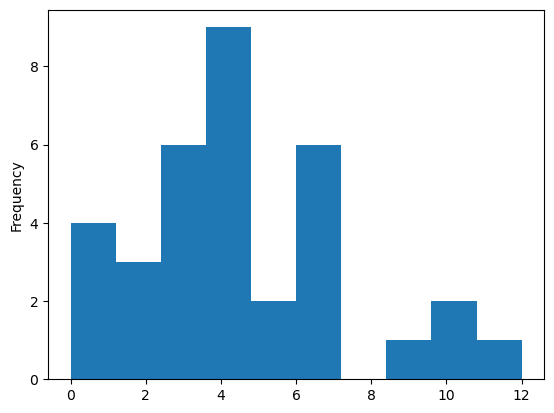

In [48]:
df['years_before_first_title'].plot.hist()

In [66]:
import seaborn as sns

<Axes: xlabel='years_before_first_title', ylabel='Count'>

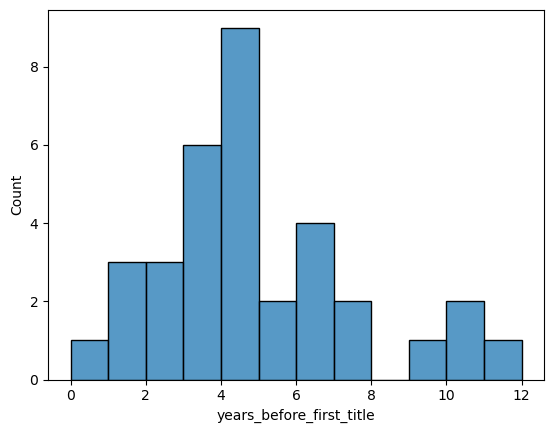

In [80]:
sns.histplot(data=df['years_before_first_title'], bins=12)